# Import Neccessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix


# Data Cleaning

In [3]:
df = pd.read_csv("/content/case_data_csv.csv")

In [4]:
df_new = df.copy()

In [5]:
df.head()

,Broker_account_number,Contract_number,Customer_segment,Line_of_business,Product_type,Annual_premium,Payment_frequency,Customer_ID,Customer_age,Customer_type,Customer_region,Customer_province,Broker_region,Broker_province,Is_direct_debit,Broker_cor,Customer_urbanization,Broker_urbanization
0,DJEA04015816746062,DJUI09715331435925,Midcorp,I - Property,I05 - BUILDING,2632.45,Annually,8643674.0,No age,Enterprise,BRU,BRU,BRU,BRU,0.0,"5,619,861,997",Urban,Urban
1,DJEA04015816746062,GJZP42914011343072,Midcorp,I - Property,I05 - BUILDING,4996.78,Annually,8338883.0,No age,Enterprise,BRU,BRU,BRU,BRU,0.0,"5,619,861,997",Urban,Urban
2,DJEA04015816746062,NXLM98303446560119,Midcorp,I - Property,I05 - BUILDING,1734.62,Annually,8338892.0,No age,Enterprise,BRU,BRU,BRU,BRU,0.0,"5,619,861,997",Urban,Urban
3,DJEA04015816746062,AITL42127947858417,Midcorp,I - Property,I05 - BUILDING,2460.68,Annually,8338893.0,No age,Enterprise,BRU,BRU,BRU,BRU,0.0,"5,619,861,997",Urban,Urban
4,UTAY89397600598587,IBPJ05282371448674,Midcorp,D - Property,D01 - RISQ IND,7731.46,Annually,3301814.0,No age,Enterprise,BRU,BRU,BRU,BRU,0.0,"6,721,423,458",Urban,Urban


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452222 entries, 0 to 452221
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Broker_account_number  452221 non-null  object 
 1   Contract_number        452220 non-null  object 
 2   Customer_segment       452220 non-null  object 
 3   Line_of_business       452220 non-null  object 
 4   Product_type           452220 non-null  object 
 5   Annual_premium         452220 non-null  float64
 6   Payment_frequency      452220 non-null  object 
 7   Customer_ID            452220 non-null  float64
 8   Customer_age           452220 non-null  object 
 9   Customer_type          452220 non-null  object 
 10  Customer_region        452220 non-null  object 
 11  Customer_province      452220 non-null  object 
 12  Broker_region          452220 non-null  object 
 13  Broker_province        452220 non-null  object 
 14  Is_direct_debit        452220 non-nu

In [7]:
df.isnull().sum()

,0
Broker_account_number,1
Contract_number,2
Customer_segment,2
Line_of_business,2
Product_type,2
Annual_premium,2
Payment_frequency,2
Customer_ID,2
Customer_age,2
Customer_type,2


In [8]:
#To Check if all the missing values are in the same row
df[df.isnull().any(axis=1)]

,Broker_account_number,Contract_number,Customer_segment,Line_of_business,Product_type,Annual_premium,Payment_frequency,Customer_ID,Customer_age,Customer_type,Customer_region,Customer_province,Broker_region,Broker_province,Is_direct_debit,Broker_cor,Customer_urbanization,Broker_urbanization
452220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452221,Note:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Since it is the same row, we will be losing 1 row out of 452220 so therefore we will be dropping this row
df = df.drop(index=df[df.isnull().any(axis=1)].index)
df.isnull().sum()

,0
Broker_account_number,0
Contract_number,0
Customer_segment,0
Line_of_business,0
Product_type,0
Annual_premium,0
Payment_frequency,0
Customer_ID,0
Customer_age,0
Customer_type,0


In [10]:
#Now there is no missing data, we can move on to the next step.

# EDA

## Univariate Analysis

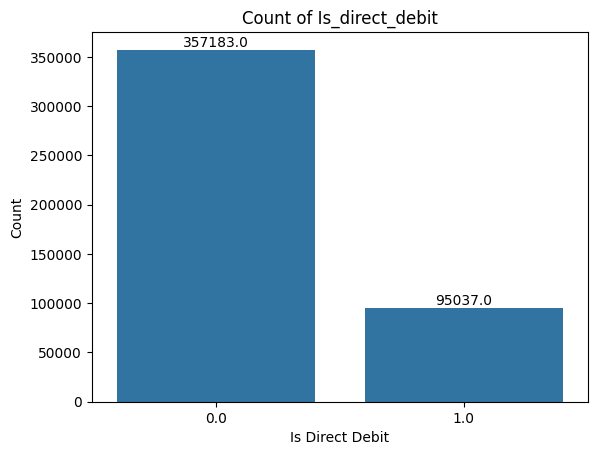

In [11]:
ax = sns.countplot(data=df, x='Is_direct_debit')
plt.title('Count of Is_direct_debit')
plt.xlabel('Is Direct Debit')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [12]:
percentage_of_Adoption = 95037*100/(95037+357183)
print("The Direct Debit Adoption is: ", round(percentage_of_Adoption,2),"%")

The Direct Debit Adoption is:  21.02 %


Given the Direct Debit Adoption is close to 20%, this is what we are trying to improve

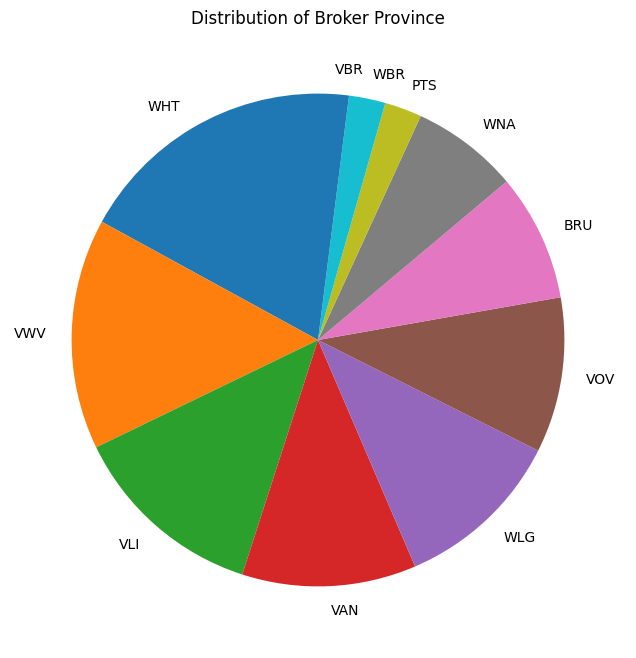

In [13]:
plt.figure(figsize=(10, 8))
df['Broker_province'].value_counts().plot.pie(startangle=90)
plt.title('Distribution of Broker Province')
plt.ylabel('') # Remove default 'ylabel'
plt.show()

In [14]:
province_counts = df['Broker_province'].value_counts()
province_percentages = round((province_counts / province_counts.sum()) * 100,2)
frequency_table_bp = pd.DataFrame({'Count': province_counts, 'Percentage': province_percentages})
print("Frequency Table for Broker Province:")
display(frequency_table_bp)

Frequency Table for Broker Province:


,Count,Percentage
Broker_province,,
WHT,77037,17.04
VWV,68459,15.14
VLI,58111,12.85
VAN,51662,11.42
WLG,50390,11.14
VOV,46065,10.19
BRU,37736,8.34
WNA,31802,7.03
PTS,11031,2.44


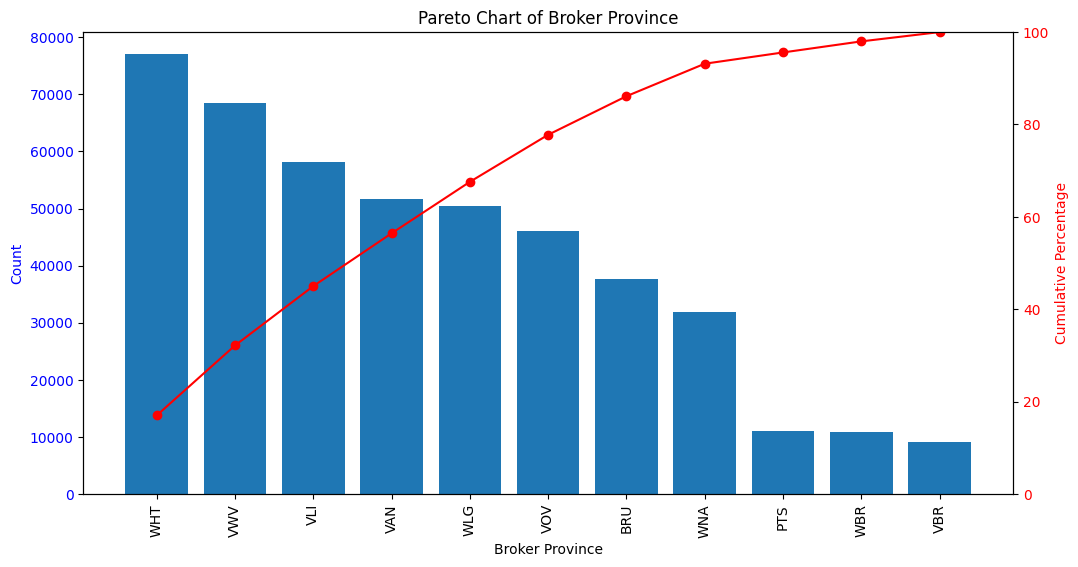

In [15]:
province_counts = df['Broker_province'].value_counts()
cumulative_percentage = province_counts.cumsum() / province_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart
ax1.bar(province_counts.index, province_counts.values)
ax1.set_xlabel('Broker Province')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Pareto line
ax2 = ax1.twinx()
ax2.plot(cumulative_percentage.index, cumulative_percentage.values, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

plt.title('Pareto Chart of Broker Province')
plt.show()

It doesn't follow Pareto Principle so the brokers are sufficiently distributed across the provinces of Belgium.

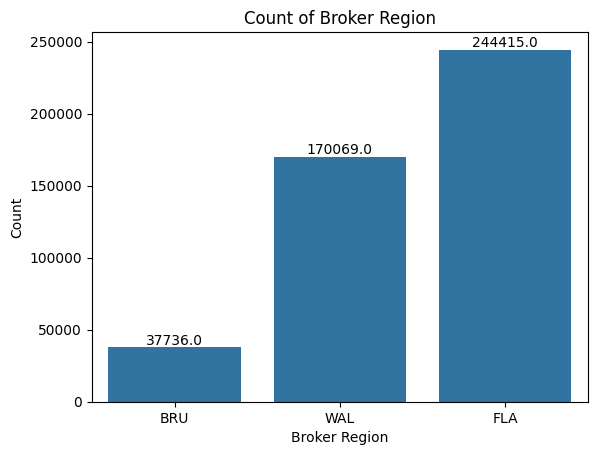

In [16]:
ax = sns.countplot(data=df, x='Broker_region')
plt.title('Count of Broker Region')
plt.xlabel('Broker Region')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

FLA has the most number of provinces and thus there are also more number of brokers in that region

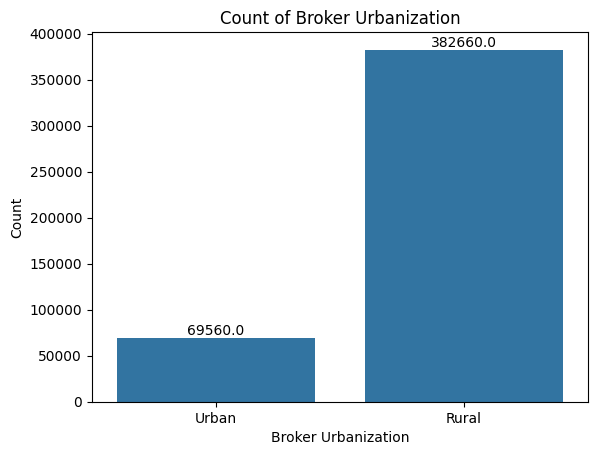

In [17]:
ax = sns.countplot(data=df, x='Broker_urbanization')
plt.title('Count of Broker Urbanization')
plt.xlabel('Broker Urbanization')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



In [18]:
# Calculate and display percentages
urbanization_counts = df['Broker_urbanization'].value_counts()
urbanization_percentages = round((urbanization_counts / urbanization_counts.sum()) * 100,2)

print("\nPercentage of brokers by urbanization:")
print(urbanization_percentages)


Percentage of brokers by urbanization:
Broker_urbanization
Rural    84.62
Urban    15.38
Name: count, dtype: float64


Most brokers are from rural

## Customer Univariate Analysis

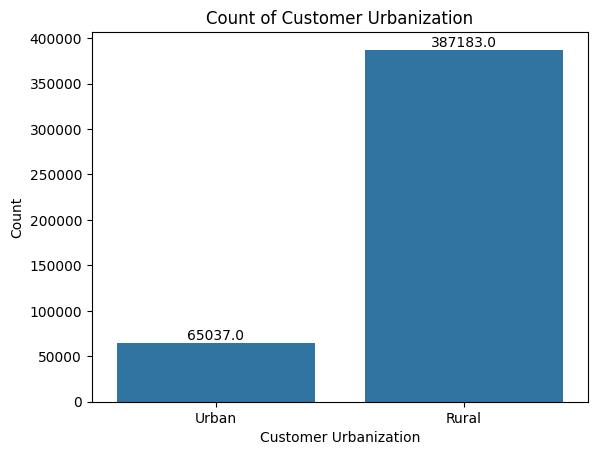

In [19]:
# Bar graph for customer_urbanization
ax = sns.countplot(data=df, x='Customer_urbanization')
plt.title('Count of Customer Urbanization')
plt.xlabel('Customer Urbanization')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



In [20]:
# Calculate and display percentages for customer_urbanization
urbanization_counts_customer = df['Customer_urbanization'].value_counts()
urbanization_percentages_customer = round((urbanization_counts_customer / urbanization_counts_customer.sum()) * 100,2)

print("\nPercentage of customers by urbanization:")
print(urbanization_percentages_customer)


Percentage of customers by urbanization:
Customer_urbanization
Rural    85.62
Urban    14.38
Name: count, dtype: float64


Most Customers are also from the rural region. So no mismatch between broker and rural. The %ages are also roughly similar

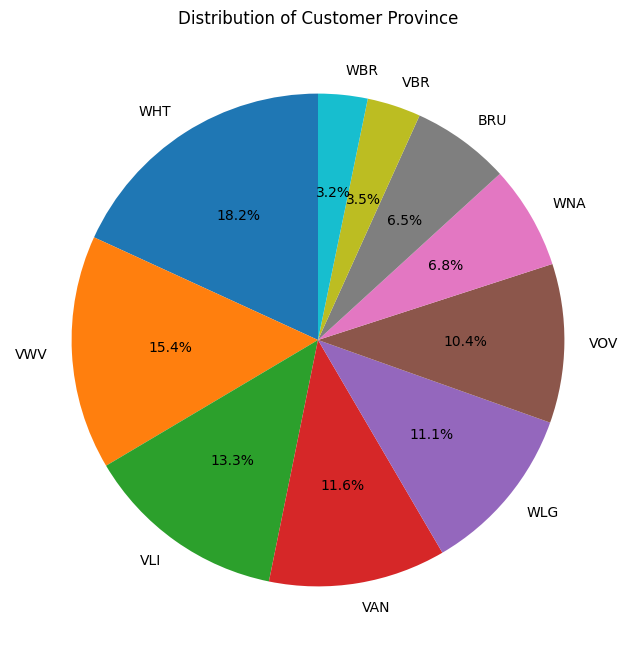

Frequency Table for Customer Province:


,Count,Percentage
Customer_province,,
WHT,82120,18.159303
VWV,69477,15.363540
VLI,60074,13.284242
VAN,52533,11.616691
WLG,50350,11.133961
VOV,47189,10.434965
WNA,30698,6.788289
BRU,29204,6.457919
VBR,15918,3.519968


In [21]:
# Pie chart for Customer_province
plt.figure(figsize=(10, 8))
df['Customer_province'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Province')
plt.ylabel('') # Remove default 'ylabel'
plt.show()

# Frequency table for Customer_province
province_counts_customer = df['Customer_province'].value_counts()
province_percentages_customer = (province_counts_customer / province_counts_customer.sum()) * 100
frequency_table_customer_province = pd.DataFrame({'Count': province_counts_customer, 'Percentage': province_percentages_customer})
print("Frequency Table for Customer Province:")
display(frequency_table_customer_province)

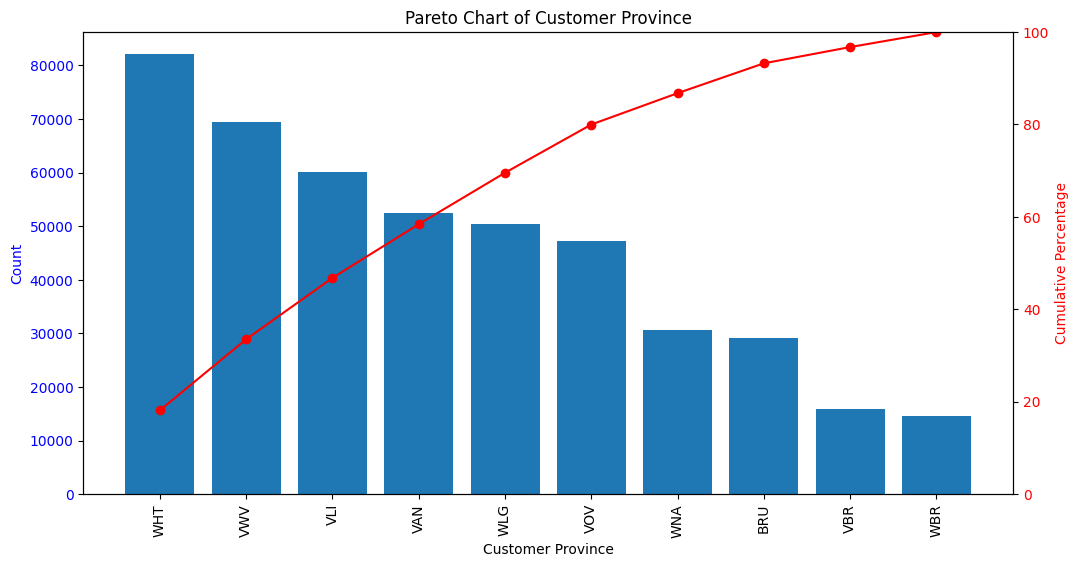

In [22]:
province_counts_customer = df['Customer_province'].value_counts()
cumulative_percentage_customer = province_counts_customer.cumsum() / province_counts_customer.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart
ax1.bar(province_counts_customer.index, province_counts_customer.values)
ax1.set_xlabel('Customer Province')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Pareto line
ax2 = ax1.twinx()
ax2.plot(cumulative_percentage_customer.index, cumulative_percentage_customer.values, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

plt.title('Pareto Chart of Customer Province')
plt.show()

Pareto principle does not apply here either. So customer base is also good

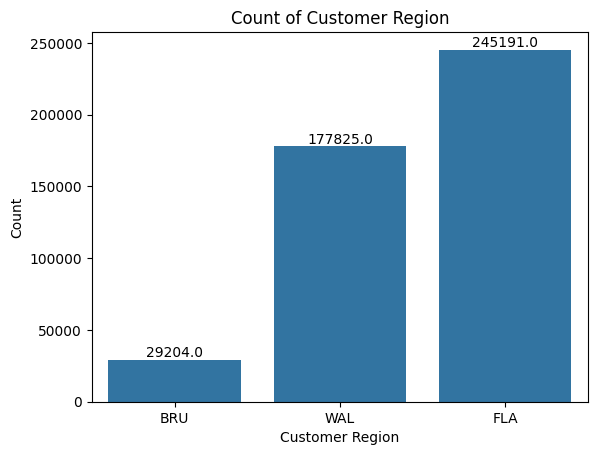

In [23]:
# Bar graph for customer_region
ax = sns.countplot(data=df, x='Customer_region')
plt.title('Count of Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [24]:
# Analysis of provinces under each customer region and overlap check
# Get unique provinces per customer region
provinces_per_customer_region = df.groupby('Customer_region')['Customer_province'].unique()

# Print the number of provinces per customer region
print("Number of provinces under each customer region:")
for region, provinces in provinces_per_customer_region.items():
    print(f"{region}: {len(provinces)} provinces - {', '.join(provinces)}")

# Check for overlapping provinces between customer regions
all_customer_provinces = df['Customer_province'].unique()
overlapping_customer_provinces = []

for province in all_customer_provinces:
    regions_with_province = []
    for region, provinces in provinces_per_customer_region.items():
        if province in provinces:
            regions_with_province.append(region)
    if len(regions_with_province) > 1:
        overlapping_customer_provinces.append(f"{province} is in regions: {', '.join(regions_with_province)}")

if overlapping_customer_provinces:
    print("\nOverlapping customer provinces found:")
    for overlap in overlapping_customer_provinces:
        print(overlap)
else:
    print("\nNo overlapping customer provinces found between regions.")

Number of provinces under each customer region:
BRU: 1 provinces - BRU
FLA: 5 provinces - VBR, VAN, VLI, VWV, VOV
WAL: 4 provinces - WBR, WLG, WNA, WHT

No overlapping customer provinces found between regions.


In [25]:
for i in ['Customer_age', 'Customer_segment','Line_of_business','Payment_frequency', 'Customer_type']:
  print(df[i].value_counts())

Customer_age
D = 40-69    235168
S = +69       91443
No age        76137
C = 30-39     36898
B = 25-29      8974
A = 18-24      3600
Name: count, dtype: int64
Customer_segment
Retail     372615
SME         56126
Midcorp     23479
Name: count, dtype: int64
Line_of_business
A - Motor          177286
I - Property       114426
P - Liability       82765
N - Accident        50135
E - Liability       20107
R - Engineering      5184
D - Property         2317
Name: count, dtype: int64
Payment_frequency
Annually         326221
Monthly           88416
Semi-annually     19231
Quarterly         18352
Name: count, dtype: int64
Customer_type
Physical person    376083
Enterprise          76137
Name: count, dtype: int64


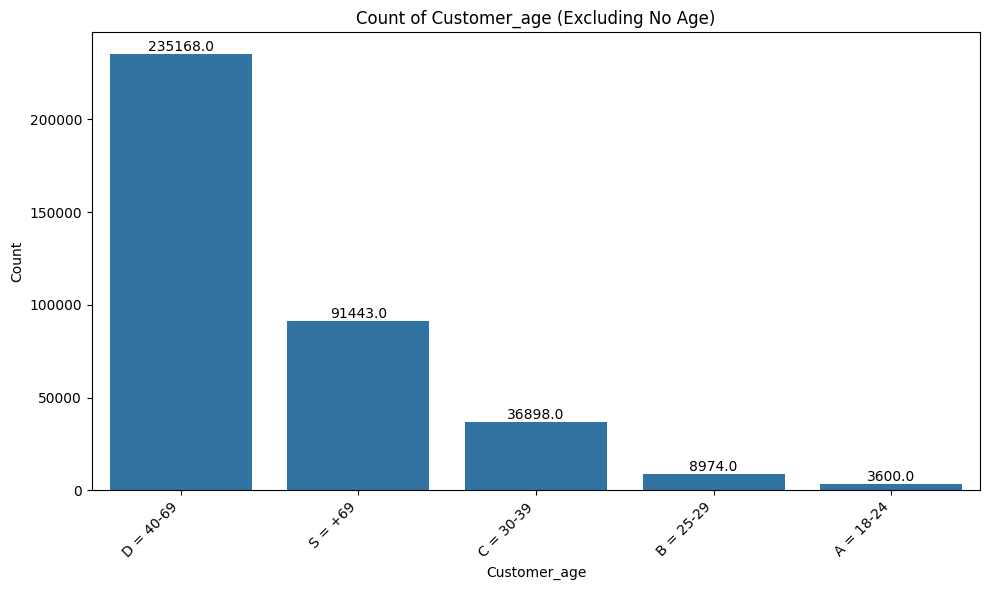

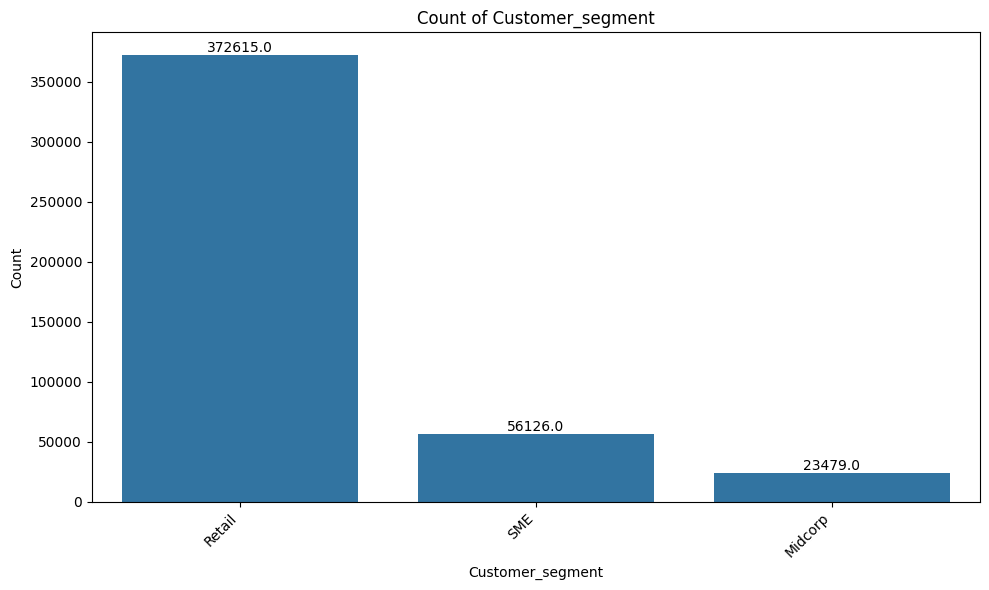

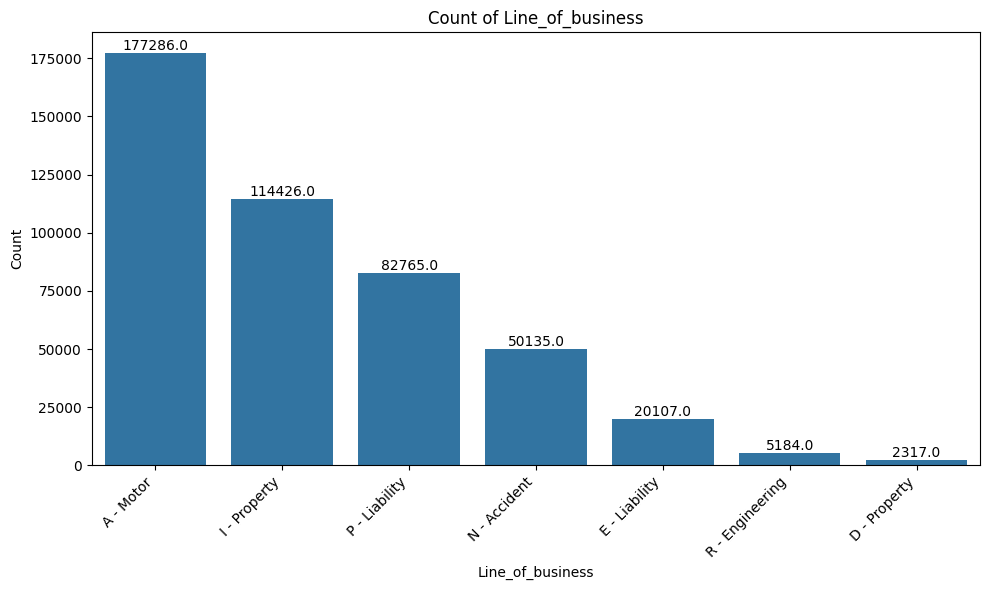

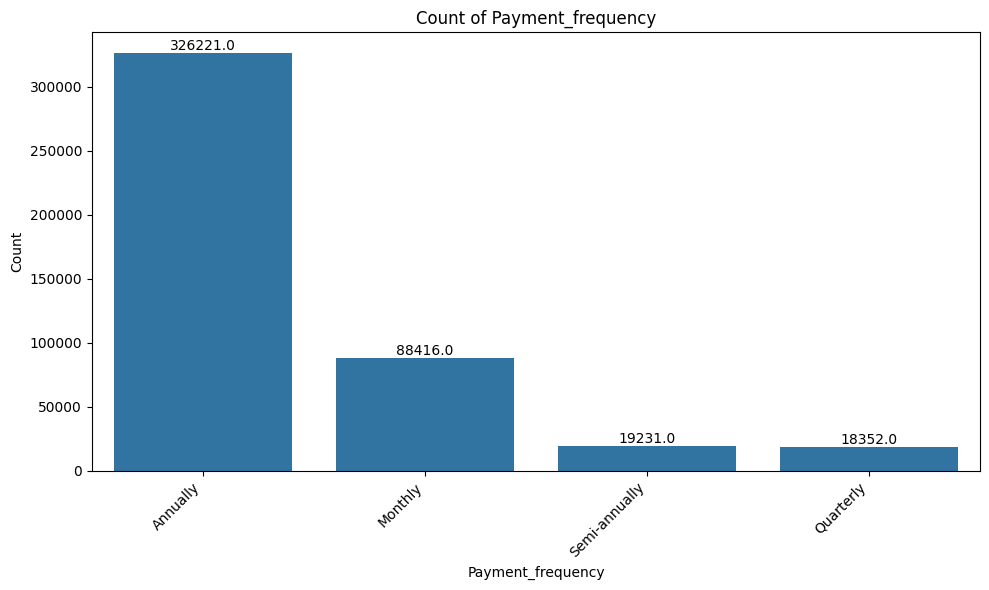

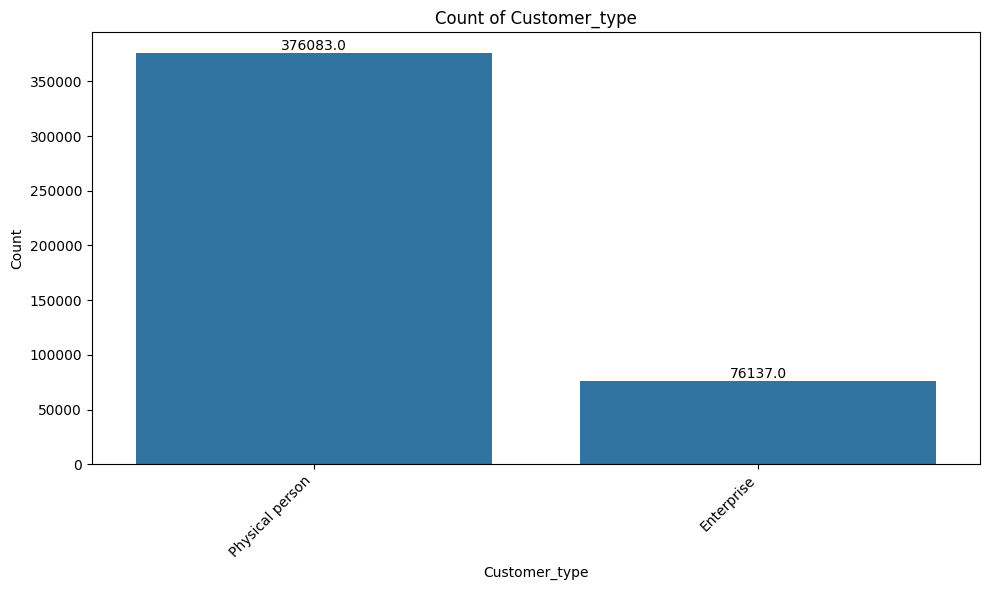

In [26]:
columns_to_plot = ['Customer_age', 'Customer_segment', 'Line_of_business', 'Payment_frequency', 'Customer_type']

for col in columns_to_plot:
    if col == 'Customer_age':
        # Exclude 'No age' for Customer_age
        df_filtered_age = df[df['Customer_age'] != 'No age'].copy()
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df_filtered_age, x=col, order=df_filtered_age[col].value_counts().index)
        plt.title(f'Count of {col} (Excluding No Age)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    else:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

Enterprise form most of our business. Most of our customers tend to pay annually. Most of our business is in the motor industry.

# Bivariate Analysis

## Customer Variables vs TARGET

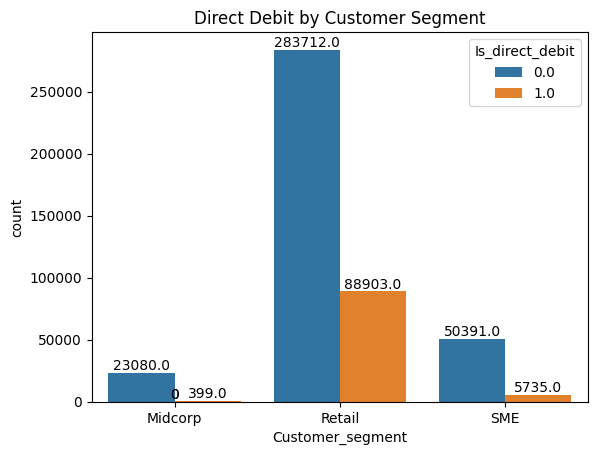


Percentage of Direct Debit Adoption by Customer Segment:
Is_direct_debit   Percentage_Direct_Debit
Customer_segment                         
Midcorp                              1.70
Retail                              23.86
SME                                 10.22


In [27]:
ax = sns.countplot(x='Customer_segment', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Customer Segment')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Calculate and display percentages of direct debit adoption by customer segment
direct_debit_counts = df.groupby('Customer_segment')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts['Total'] = direct_debit_counts[0.0] + direct_debit_counts[1.0]
direct_debit_counts['Percentage_Direct_Debit'] = round((direct_debit_counts[1.0] / direct_debit_counts['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Customer Segment:")
print(direct_debit_counts[['Percentage_Direct_Debit']])

Most of our customers are in retail, and they are the ones who have subscribed most to Direct Debit. The % of subscription is also highest in Direct Debit only

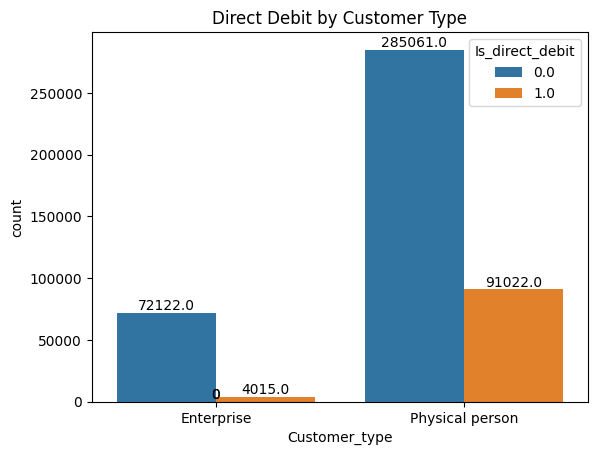


Percentage of Direct Debit Adoption by Customer Type:
Is_direct_debit  Percentage_Direct_Debit
Customer_type                           
Enterprise                          5.27
Physical person                    24.20


In [28]:
ax = sns.countplot(x='Customer_type', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Customer Type')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Calculate and display percentages of direct debit adoption by customer type
direct_debit_counts_type = df.groupby('Customer_type')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_type['Total'] = direct_debit_counts_type[0.0] + direct_debit_counts_type[1.0]
direct_debit_counts_type['Percentage_Direct_Debit'] = round((direct_debit_counts_type[1.0] / direct_debit_counts_type['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Customer Type:")
print(direct_debit_counts_type[['Percentage_Direct_Debit']])

This just reiterates our previous point. Given the difficulty in enabling DD for B2B, we can see that only a small chunk sign up for it. So Physical person might be better.

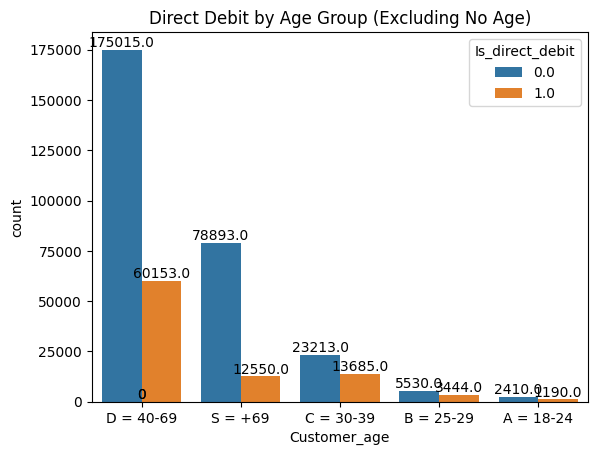

Percentage of Direct Debit Adoption by Age Group (Excluding No Age):
Customer_age
A = 18-24    33.06
B = 25-29    38.38
C = 30-39    37.09
D = 40-69    25.58
S = +69      13.72
dtype: float64


In [29]:
# Filter out 'No age'
df_filtered = df[df['Customer_age'] != 'No age'].copy()

ax = sns.countplot(x='Customer_age', hue='Is_direct_debit', data=df_filtered,
              order=df_filtered['Customer_age'].value_counts().index)
plt.title('Direct Debit by Age Group (Excluding No Age)')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Calculate counts of direct debit for each age group
direct_debit_counts = df_filtered.groupby('Customer_age')['Is_direct_debit'].sum()

# Calculate total counts for each age group
total_counts = df_filtered.groupby('Customer_age')['Customer_age'].count()

# Calculate percentages
percentage_direct_debit = (direct_debit_counts / total_counts) * 100

# Display percentages rounded to 2 decimal places
print("Percentage of Direct Debit Adoption by Age Group (Excluding No Age):")
print(round(percentage_direct_debit, 2))

We can see that the younger age group is more willing to susbcribe to this direct debit concept as they are more tech-savvy and don't want the hassle of paying. Even the D group is okay, but it is the very old people who aren't doing it

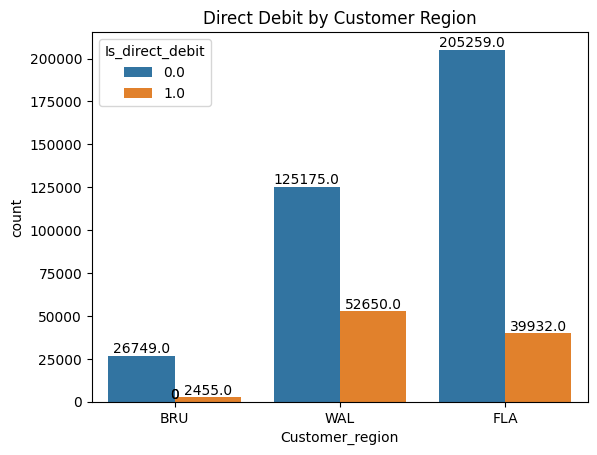


Percentage of Direct Debit Adoption by Customer Region:
Is_direct_debit  Percentage_Direct_Debit
Customer_region                         
BRU                                 8.41
FLA                                16.29
WAL                                29.61


In [30]:
ax = sns.countplot(x='Customer_region', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Customer Region')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Calculate and display percentages of direct debit adoption by customer region
direct_debit_counts_region = df.groupby('Customer_region')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_region['Total'] = direct_debit_counts_region[0.0] + direct_debit_counts_region[1.0]
direct_debit_counts_region['Percentage_Direct_Debit'] = round((direct_debit_counts_region[1.0] / direct_debit_counts_region['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Customer Region:")
print(direct_debit_counts_region[['Percentage_Direct_Debit']])

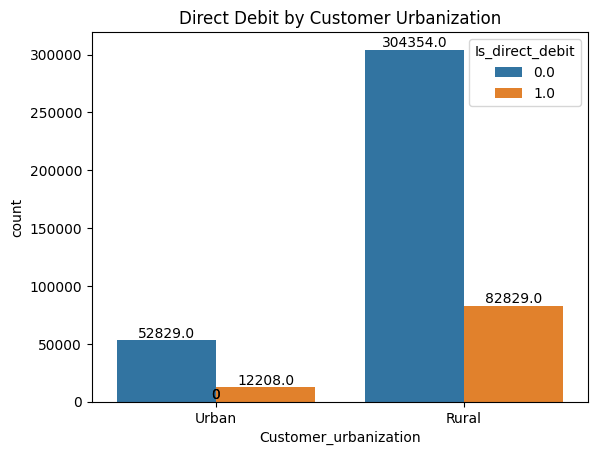


Percentage of Direct Debit Adoption by Customer Urbanization:
Is_direct_debit        Percentage_Direct_Debit
Customer_urbanization                         
Rural                                    21.39
Urban                                    18.77


In [31]:
ax = sns.countplot(x='Customer_urbanization', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Customer Urbanization')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Calculate and display percentages of direct debit adoption by customer urbanization
direct_debit_counts_customer_urbanization = df.groupby('Customer_urbanization')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_customer_urbanization['Total'] = direct_debit_counts_customer_urbanization[0.0] + direct_debit_counts_customer_urbanization[1.0]
direct_debit_counts_customer_urbanization['Percentage_Direct_Debit'] = round((direct_debit_counts_customer_urbanization[1.0] / direct_debit_counts_customer_urbanization['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Customer Urbanization:")
print(direct_debit_counts_customer_urbanization[['Percentage_Direct_Debit']])

We would expect the Urban population to be more interested in signing up for the direct debit scheme, but it instead seems to be the rural population

## Broker Variables vs Target

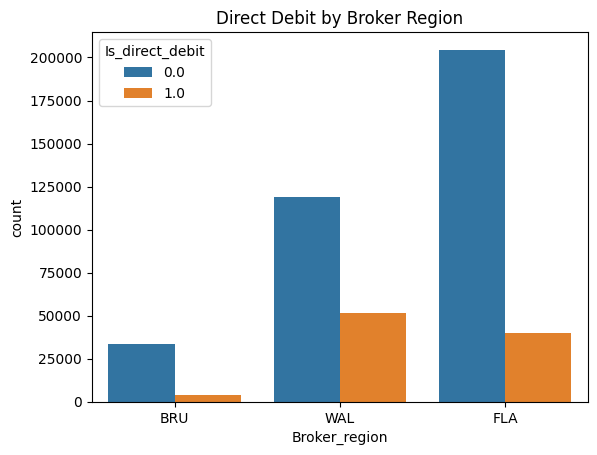


Percentage of Direct Debit Adoption by Broker Region:
Is_direct_debit  Percentage_Direct_Debit
Broker_region                           
BRU                                10.65
FLA                                16.29
WAL                                30.11


In [32]:
sns.countplot(x='Broker_region', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Broker Region')
plt.show()

# Calculate and display percentages of direct debit adoption by broker region
direct_debit_counts_broker_region = df.groupby('Broker_region')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_broker_region['Total'] = direct_debit_counts_broker_region[0.0] + direct_debit_counts_broker_region[1.0]
direct_debit_counts_broker_region['Percentage_Direct_Debit'] = round((direct_debit_counts_broker_region[1.0] / direct_debit_counts_broker_region['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Broker Region:")
print(direct_debit_counts_broker_region[['Percentage_Direct_Debit']])

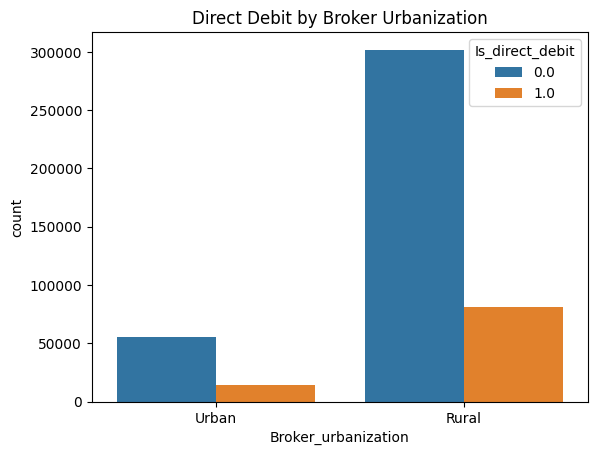


Percentage of Direct Debit Adoption by Broker Urbanization:
Is_direct_debit      Percentage_Direct_Debit
Broker_urbanization                         
Rural                                  21.13
Urban                                  20.41


In [33]:
# Broker urbanization (Urban vs Rural)
sns.countplot(x='Broker_urbanization', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Broker Urbanization')
plt.show()

# Calculate and display percentages of direct debit adoption by broker urbanization
direct_debit_counts_broker_urbanization = df.groupby('Broker_urbanization')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_broker_urbanization['Total'] = direct_debit_counts_broker_urbanization[0.0] + direct_debit_counts_broker_urbanization[1.0]
direct_debit_counts_broker_urbanization['Percentage_Direct_Debit'] = round((direct_debit_counts_broker_urbanization[1.0] / direct_debit_counts_broker_urbanization['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Broker Urbanization:")
print(direct_debit_counts_broker_urbanization[['Percentage_Direct_Debit']])

Intrestingly, the broker percentage of direct debit is similar between rural and urban, but this wasn't the case in customer. So, let us proceed and see the relationship between customer and broker

## Exploring Broker and Customer Relationships

In [34]:
pd.crosstab(df['Customer_urbanization'], df['Broker_urbanization'], margins=True, normalize='index') * 100


Broker_urbanization,Rural,Urban
Customer_urbanization,,
Rural,88.924100,11.075900
Urban,58.983348,41.016652
All,84.618106,15.381894


This is interesting because we see a lot more urban customers going to Rural brokers indicating that there might be more rural brokers with the company.

But given that 84% of customers are served by rural brokers, and only 21% of them are pushing direct debit, it means that they need to be trained better.

In [35]:
pd.crosstab(df['Customer_region'], df['Broker_region'], margins=True, normalize='index') * 100

Broker_region,BRU,FLA,WAL
Customer_region,,,
BRU,66.182715,14.898644,18.918641
FLA,3.389602,95.184570,1.425827
WAL,5.678054,3.756502,90.565444
All,8.344611,54.047809,37.607580


In [36]:
# Boolean column: True if customer region = broker region
df_new['Region_match'] = df_new['Customer_region'] == df_new['Broker_region']
region_match_rate = df_new['Region_match'].mean() * 100
print(f"Customer–Broker Region Match Rate: {region_match_rate:.2f}%")

Customer–Broker Region Match Rate: 91.49%


This match rate is brought down by mainly the BRU customer people not going as much to BRU brokers, at least not in the same overwhelming amount as it does with the other 2 regions

In [37]:
df_new['Province_match'] = df_new['Customer_province'] == df_new['Broker_province']
province_match_rate = df_new['Province_match'].mean() * 100
print(f"Customer–Broker Province Match Rate: {province_match_rate:.2f}%")

Customer–Broker Province Match Rate: 87.09%


## Product and Payment Related Patterns vs TARGET

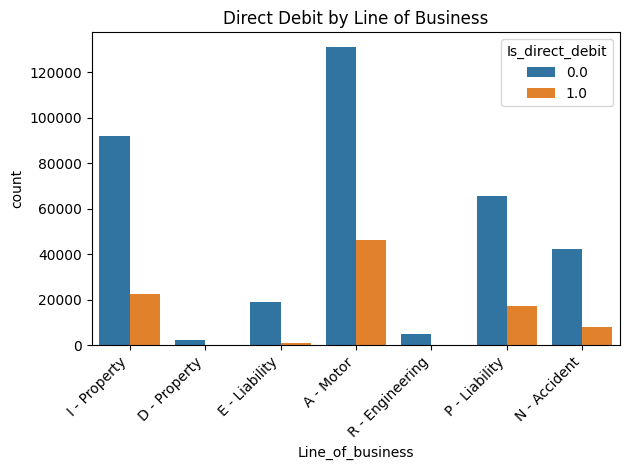


Percentage of Direct Debit Adoption by Line of Business:
Is_direct_debit   Percentage_Direct_Debit
Line_of_business                         
A - Motor                           26.14
D - Property                         0.65
E - Liability                        5.16
I - Property                        19.72
N - Accident                        15.72
P - Liability                       20.65
R - Engineering                      1.87


In [38]:
# Line of business
ax = sns.countplot(x='Line_of_business', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Line of Business')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and display percentages of direct debit adoption by Line of Business
direct_debit_counts_lob = df.groupby('Line_of_business')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_lob['Total'] = direct_debit_counts_lob[0.0] + direct_debit_counts_lob[1.0]
direct_debit_counts_lob['Percentage_Direct_Debit'] = round((direct_debit_counts_lob[1.0] / direct_debit_counts_lob['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Line of Business:")
print(direct_debit_counts_lob[['Percentage_Direct_Debit']])

Property and Engineering have the lowest Direct Debit adoption rates.

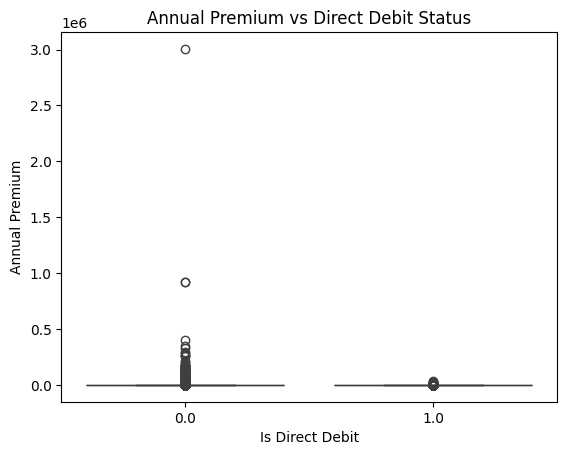

In [39]:
# Annual premium vs Direct Debit (Box Plot)
sns.boxplot(x='Is_direct_debit', y='Annual_premium', data=df)
plt.title('Annual Premium vs Direct Debit Status')
plt.xlabel('Is Direct Debit')
plt.ylabel('Annual Premium')
plt.show()

The box plot suggests that customers who have opted for direct debit generally have lower annual premiums compared to those who have not. The distribution of annual premiums for direct debit customers is also more concentrated around the lower values.

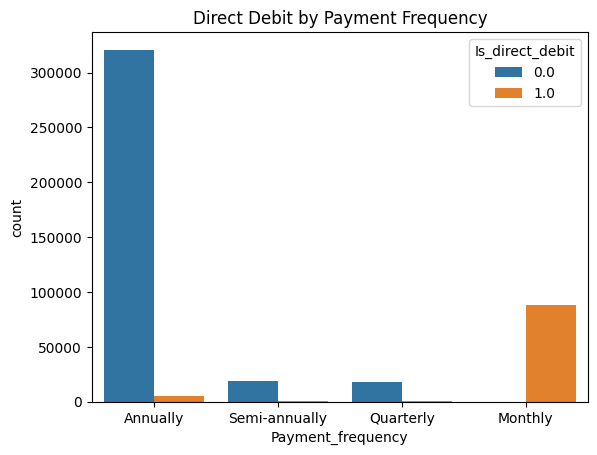


Percentage of Direct Debit Adoption by Payment Frequency:
Is_direct_debit    Percentage_Direct_Debit
Payment_frequency                         
Annually                              1.63
Monthly                             100.00
Quarterly                             4.87
Semi-annually                         2.17


In [40]:
# Payment frequency
sns.countplot(x='Payment_frequency', hue='Is_direct_debit', data=df)
plt.title('Direct Debit by Payment Frequency')
plt.show()

# Calculate and display percentages of direct debit adoption by payment frequency
direct_debit_counts_payment = df.groupby('Payment_frequency')['Is_direct_debit'].value_counts().unstack(fill_value=0)
direct_debit_counts_payment['Total'] = direct_debit_counts_payment[0.0] + direct_debit_counts_payment[1.0]
direct_debit_counts_payment['Percentage_Direct_Debit'] = round((direct_debit_counts_payment[1.0] / direct_debit_counts_payment['Total']) * 100, 2)

print("\nPercentage of Direct Debit Adoption by Payment Frequency:")
print(direct_debit_counts_payment[['Percentage_Direct_Debit']])


Give me % of direct debit up to 2 decimal places. and Box plot for annual premium with direct debit as hue

## Heatmap

In [41]:
categorical_vars = [
    'Customer_segment', 'Line_of_business', 'Product_type', 'Customer_age',
    'Customer_type', 'Customer_urbanization', 'Customer_region',
    'Customer_province', 'Broker_urbanization', 'Broker_region',
    'Broker_province', 'Payment_frequency'
]

numerical_vars = ['Annual_premium']

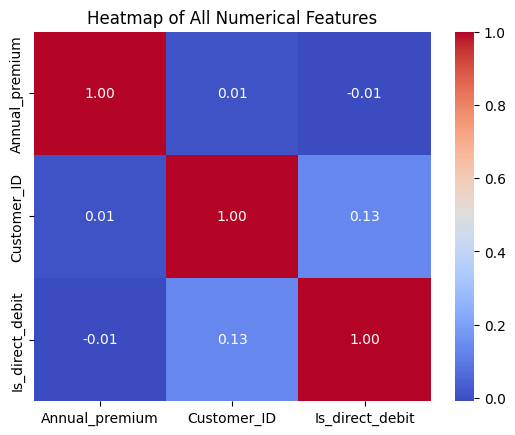

In [42]:
# Generate heatmap between all numerical features

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of All Numerical Features')
plt.show()

The highest correlation for the target variable is with Customer_id. I want to know if that is by luck or if there is some structure.

In [42]:
df_heatmap = df.copy()
corr_target = df_.corr(numeric_only=True)["Is_direct_debit"].drop("Is_direct_debit")

plt.figure(figsize=(6,8))
sns.heatmap(corr_target.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Correlation of Is_direct_debit with Other Features", fontsize=14)
plt.show()

In [43]:
df_new['Customer_ID_quartile'] = pd.qcut(
    df_new['Customer_ID'],
    4,
    labels=['Q1 (Oldest)', 'Q2', 'Q3', 'Q4 (Newest)']
)

# Adoption rate by quartile
adoption_by_quartile = (
    df_new.groupby('Customer_ID_quartile', observed=False)['Is_direct_debit']
          .mean() * 100
)
print(adoption_by_quartile)


Customer_ID_quartile
Q1 (Oldest)    12.785812
Q2             20.228029
Q3             24.074336
Q4 (Newest)    26.974481
Name: Is_direct_debit, dtype: float64


This tells me that newer customer ids have higher direct debits than older ones which means that they have been pushing direct debi better to newer customers, and the newers ones could also be younger.

In [44]:
df.columns

Index(['Broker_account_number', 'Contract_number', 'Customer_segment',
       'Line_of_business', 'Product_type', 'Annual_premium',
       'Payment_frequency', 'Customer_ID', 'Customer_age', 'Customer_type',
       'Customer_region', 'Customer_province', 'Broker_region',
       'Broker_province', 'Is_direct_debit', 'Broker_cor',
       'Customer_urbanization', 'Broker_urbanization'],
      dtype='object')

In [45]:
# Create a copy to avoid modifying the original dataframe if needed later
df_encoded = df.copy()

# Apply Label Encoding to each selected categorical column
for col in categorical_vars:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("DataFrame after Label Encoding:")
display(df_encoded.tail(10))

DataFrame after Label Encoding:


,Broker_account_number,Contract_number,Customer_segment,Line_of_business,Product_type,Annual_premium,Payment_frequency,Customer_ID,Customer_age,Customer_type,Customer_region,Customer_province,Broker_region,Broker_province,Is_direct_debit,Broker_cor,Customer_urbanization,Broker_urbanization
452210,EKLV15946251447307,KOUP24549678776220,2,3,29,159.54,0,8743592.0,4,0,2,8,1,1,0.0,"5,068,991,361",0,0
452211,CVPO35750602123872,EIGP53882106301831,2,0,1,985.50,0,9217239.0,4,0,2,7,1,1,0.0,"4,921,076,157",0,0
452212,CVPO35750602123872,HQTS15086648032146,2,0,1,1297.08,0,9217239.0,4,0,2,7,1,1,0.0,"4,921,076,157",0,0
452213,CVPO35750602123872,OEPQ70201140659869,2,2,14,137.50,0,9217239.0,4,0,2,7,1,1,0.0,"4,921,076,157",0,0
452214,CVPO35750602123872,ZQKB59155199357348,2,2,14,137.50,0,9217258.0,4,0,2,7,1,1,0.0,"4,921,076,157",0,0
452215,CVPO35750602123872,IANG58707232398714,2,2,13,181.27,0,9217239.0,4,0,2,7,1,1,0.0,"4,921,076,157",0,0
452216,CVPO35750602123872,LZKE76400951173012,2,2,16,183.03,0,9558824.0,4,0,1,4,1,5,0.0,"4,921,076,157",0,0
452217,CVPO35750602123872,JOAX03010925633669,2,3,30,2475.12,0,9283953.0,4,0,1,4,1,5,0.0,"4,921,076,157",0,0
452218,CVPO35750602123872,TLDF23586563957949,2,2,14,385.00,0,9217121.0,4,0,1,4,1,5,0.0,"4,921,076,157",0,0
452219,CVPO35750602123872,BEEN26027607880408,2,3,30,1739.84,0,9124820.0,4,0,1,4,1,5,0.0,"4,921,076,157",1,0


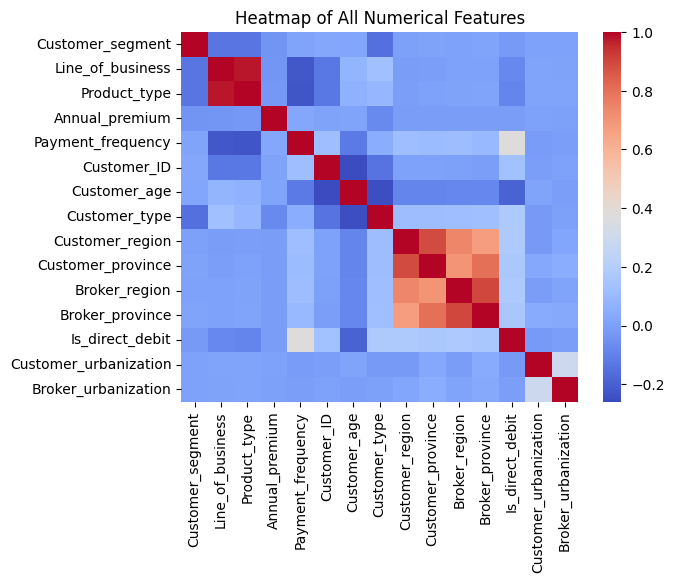

In [46]:
sns.heatmap(df_encoded.corr(numeric_only=True), cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of All Numerical Features')
plt.show()

The red and orange regions of the heatmap is expected as we had seen earlier with the crosstab in earlier.

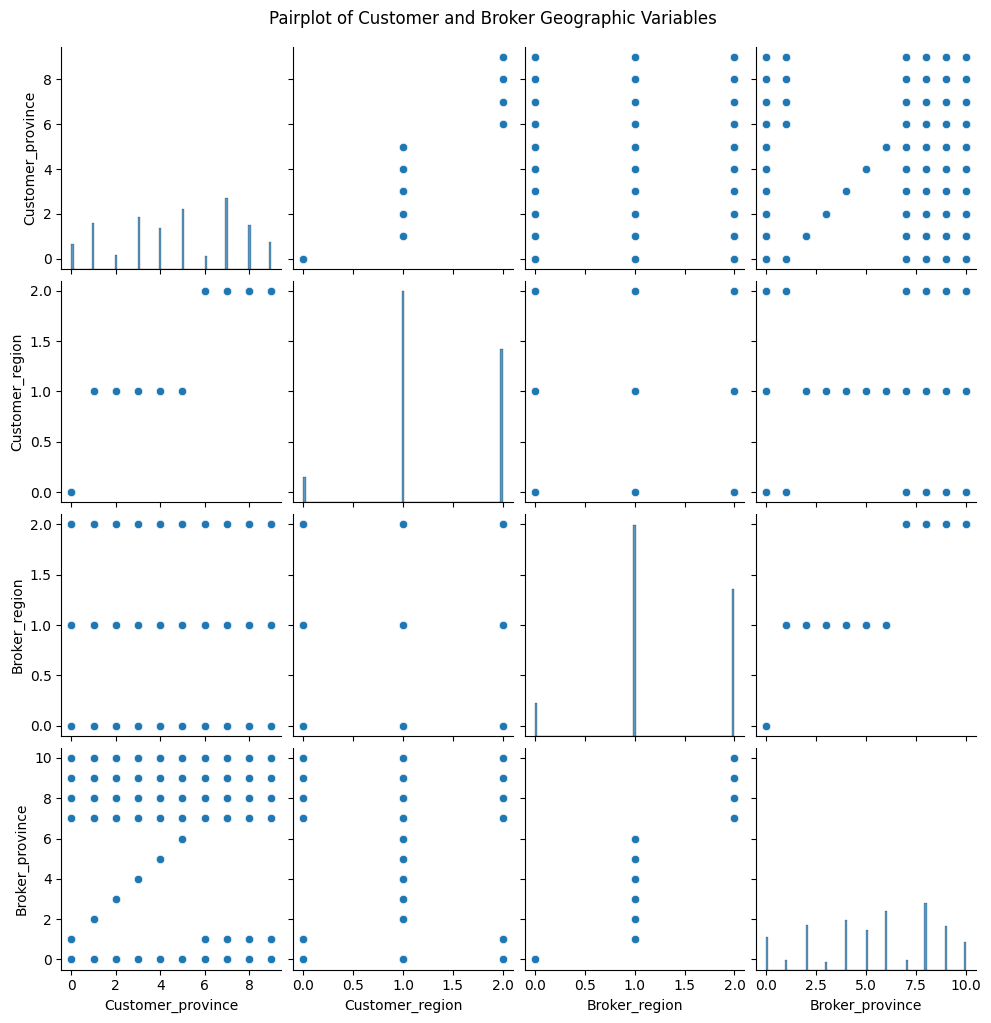

In [47]:
# Pairplot between Customer_province, Customer_region, Broker_region and Broker_province

sns.pairplot(df_encoded[[
    'Customer_province',
    'Customer_region',
    'Broker_region',
    'Broker_province'
]])

plt.suptitle(
    'Pairplot of Customer and Broker Geographic Variables',
    y=1.02
)  # Adjust title position
plt.show()

# Persona Creation/Identification

In [48]:
persona_table = (
    df.groupby(['Customer_segment', 'Customer_type', 'Customer_region'])['Is_direct_debit']
    .mean()
    .reset_index()
    .sort_values('Is_direct_debit', ascending=False)
)

print(persona_table.head(5))  # top 10 personas


   Customer_segment    Customer_type Customer_region  Is_direct_debit
11           Retail  Physical person             WAL         0.334342
17              SME  Physical person             WAL         0.221034
10           Retail  Physical person             FLA         0.192472
16              SME  Physical person             FLA         0.119371
9            Retail  Physical person             BRU         0.110142


In [49]:
overall_rate = df['Is_direct_debit'].mean() * 100
print(f"Overall Direct Debit Adoption Rate: {overall_rate:.2f}%")


Overall Direct Debit Adoption Rate: 21.02%


In [50]:
persona_table2 = (
    df.groupby(['Customer_segment', 'Customer_type', 'Customer_region','Broker_urbanization'])['Is_direct_debit']
    .mean()
    .reset_index()
    .sort_values('Is_direct_debit', ascending=False)
)

print(persona_table2.head(10))


   Customer_segment    Customer_type Customer_region Broker_urbanization  \
22           Retail  Physical person             WAL               Rural   
23           Retail  Physical person             WAL               Urban   
34              SME  Physical person             WAL               Rural   
35              SME  Physical person             WAL               Urban   
7           Midcorp  Physical person             BRU               Urban   
20           Retail  Physical person             FLA               Rural   
11          Midcorp  Physical person             WAL               Urban   
21           Retail  Physical person             FLA               Urban   
19           Retail  Physical person             BRU               Urban   
32              SME  Physical person             FLA               Rural   

    Is_direct_debit  
22         0.335665  
23         0.326886  
34         0.222504  
35         0.213058  
7          0.200000  
20         0.194442  
11       

In [51]:
# Seeing Personas over 21% adoption rate
# 2) Columns to exclude (IDs, target, and Payment_frequency as requested)
excluded = {
    'Is_direct_debit',
    'Contract_number',
    'Broker_account_number',
    'Customer_ID',
    'Payment_frequency',
    'Customer_segment'
}

# 3) Limit candidates to categorical columns only (object dtype), minus the excluded set
candidate_cols = [c for c in df.columns if (df[c].dtype == 'object' and c not in excluded)]

# 4) Function: pick random 5, groupby, filter above baseline
def random_persona_scan(df, candidate_cols, overall_rate, k=5, seed=42, min_support=None):
    """
    k: number of attributes to pick
    seed: for reproducibility
    min_support: optional minimum row-count per segment to keep (e.g., 100)
    """
    rng = np.random.default_rng(seed)
    k = min(k, len(candidate_cols))  # safety if fewer than 5 categorical columns

    selected = rng.choice(candidate_cols, size=k, replace=False).tolist()
    print("Selected attributes:", selected)

    # Group and compute adoption + support size
    grp = (
        df.groupby(selected)['Is_direct_debit']
          .agg(['mean', 'size'])
          .reset_index()
          .rename(columns={'mean': 'AdoptionRate', 'size': 'n'})
    )
    grp['AdoptionRate_%'] = grp['AdoptionRate'] * 100

    # Optional: filter out tiny segments to avoid noise
    if min_support is not None:
        grp = grp[grp['n'] >= min_support]

    # Keep only segments above overall adoption rate
    high = grp[grp['AdoptionRate_%'] > overall_rate].sort_values('AdoptionRate_%', ascending=False)

    # Neat columns to display
    display_cols = selected + ['AdoptionRate_%', 'n']
    return high[display_cols].reset_index(drop=True)

# 5) Run once (change seed to reshuffle)
high_segments = random_persona_scan(df, candidate_cols, overall_rate, k=5, seed=42, min_support=100)  # set min_support=None if you want everything
high_segments.head(50)  # show top 50 rows


Selected attributes: ['Broker_region', 'Customer_region', 'Customer_province', 'Line_of_business', 'Broker_urbanization']


,Broker_region,Customer_region,Customer_province,Line_of_business,Broker_urbanization,AdoptionRate_%,n
0,BRU,FLA,VAN,I - Property,Urban,70.676692,133
1,BRU,FLA,VLI,I - Property,Urban,69.600000,125
2,BRU,WAL,WHT,I - Property,Urban,62.992126,127
3,WAL,WAL,WNA,A - Motor,Rural,43.447069,11430
4,WAL,WAL,WNA,A - Motor,Urban,40.862423,487
5,WAL,WAL,WLG,A - Motor,Urban,40.746269,1340
6,WAL,WAL,WHT,A - Motor,Rural,39.576688,23198
7,WAL,FLA,VOV,A - Motor,Rural,38.931298,131
8,BRU,WAL,WHT,A - Motor,Urban,38.888889,180
9,FLA,WAL,WLG,A - Motor,Urban,38.532110,109


# Data Preprocessing

In [52]:
df_model = df.copy()

In [53]:
df_model = df_model.drop(columns=['Broker_account_number','Contract_number','Customer_ID','Broker_cor'])
#Broker cor is acting like an identfier variable there doesn't seem to be any point in adding it to our model
df_model.columns

Index(['Customer_segment', 'Line_of_business', 'Product_type',
       'Annual_premium', 'Payment_frequency', 'Customer_age', 'Customer_type',
       'Customer_region', 'Customer_province', 'Broker_region',
       'Broker_province', 'Is_direct_debit', 'Customer_urbanization',
       'Broker_urbanization'],
      dtype='object')

In [54]:
#Label Encoding, except Customer_age coz there is implicit ordering amongst them
le = LabelEncoder()
for i in df_model.columns:
    if i != 'Customer_age':
        df_model[i] = le.fit_transform(df_model[i])
print(df_model.head())

   Customer_segment  Line_of_business  Product_type  Annual_premium  \
0                 0                 3            24          112518   
1                 0                 3            24          115548   
2                 0                 3            24          107016   
3                 0                 3            24          111914   
4                 0                 1            12          116579   

   Payment_frequency Customer_age  Customer_type  Customer_region  \
0                  0       No age              0                0   
1                  0       No age              0                0   
2                  0       No age              0                0   
3                  0       No age              0                0   
4                  0       No age              0                0   

   Customer_province  Broker_region  Broker_province  Is_direct_debit  \
0                  0              0                0                0   
1           

In [55]:
#Opting for Hybring encoding for Customer_age - This is because No age is not part of the implict ordering
df_model['Is_no_age'] = (df_model['Customer_age'] == 'No age').astype(int)
age_order_map = {
    'A = 18-24': 0,
    'B = 25-29': 1,
    'C = 30-39': 2,
    'D = 40-69': 3,
    'S = +69'  : 4
}
df_model['Customer_age_encoded'] = df_model['Customer_age'].map(age_order_map)
df_model = df_model.drop(columns=['Customer_age'])



In [56]:
print(df_model[['Is_no_age','Customer_age_encoded']].head(30))


    Is_no_age  Customer_age_encoded
0           1                   NaN
1           1                   NaN
2           1                   NaN
3           1                   NaN
4           1                   NaN
5           1                   NaN
6           1                   NaN
7           1                   NaN
8           1                   NaN
9           1                   NaN
10          1                   NaN
11          1                   NaN
12          1                   NaN
13          1                   NaN
14          1                   NaN
15          1                   NaN
16          1                   NaN
17          1                   NaN
18          1                   NaN
19          1                   NaN
20          1                   NaN
21          1                   NaN
22          1                   NaN
23          1                   NaN
24          1                   NaN
25          1                   NaN
26          1               

In [57]:
df_model['Customer_age_encoded'] = df_model['Customer_age_encoded'].fillna(-1).astype(int)

print(df_model[['Is_no_age','Customer_age_encoded']].head(15))
print("Unique values in Customer_age_encoded:", df_model['Customer_age_encoded'].unique())

#This is done because we have missing values. So we are putting it as -1.
#Is_no_age helps act as a flag to know that no age is not part of the implict ordering

    Is_no_age  Customer_age_encoded
0           1                    -1
1           1                    -1
2           1                    -1
3           1                    -1
4           1                    -1
5           1                    -1
6           1                    -1
7           1                    -1
8           1                    -1
9           1                    -1
10          1                    -1
11          1                    -1
12          1                    -1
13          1                    -1
14          1                    -1
Unique values in Customer_age_encoded: [-1  2  3  4  1  0]


In [58]:
# Cross-tab: adoption rate by Is_no_age and Customer_age_encoded
adoption_crosstab = (
    df_model.groupby(['Is_no_age', 'Customer_age_encoded'])['Is_direct_debit']
    .mean()
    .reset_index()
)

# Convert to percentages
adoption_crosstab['AdoptionRate_%'] = adoption_crosstab['Is_direct_debit'] * 100

print(adoption_crosstab)


   Is_no_age  Customer_age_encoded  Is_direct_debit  AdoptionRate_%
0          0                     0         0.330556       33.055556
1          0                     1         0.383775       38.377535
2          0                     2         0.370887       37.088731
3          0                     3         0.255787       25.578735
4          0                     4         0.137244       13.724397
5          1                    -1         0.052734        5.273389


In [59]:
scaler = StandardScaler()
df_model['Annual_premium'] = scaler.fit_transform(df_model[['Annual_premium']])

In [60]:
df_model['Annual_premium'].head(10)

,Annual_premium
0,2.608925
1,2.709376
2,2.426521
3,2.588901
4,2.743556
5,0.042010
6,1.049276
7,0.758663
8,0.758663
9,1.867242


In [61]:
#Checking Class Imbalance
# Counts
print(df_model['Is_direct_debit'].value_counts())

# Percentages
print(df_model['Is_direct_debit'].value_counts(normalize=True) * 100)

Is_direct_debit
0    357183
1     95037
Name: count, dtype: int64
Is_direct_debit
0    78.984344
1    21.015656
Name: proportion, dtype: float64


There is imbalance in the dataset. So let us move forward with modelling, and use the Balanced Bagging Classifier and see where it takes us.

# Train Test Split

In [62]:
y = df_model['Is_direct_debit']
X = df_model.drop('Is_direct_debit', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=179)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (361776, 14)
X_test shape: (90444, 14)
y_train shape: (361776,)
y_test shape: (90444,)


In [63]:
def plot_confusion(y_true, y_pred, model_name): #Function to display confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Models and Evaluation

## Random Forest

In [82]:
rf = RandomForestClassifier(random_state=179)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [83]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest:
Accuracy: 0.9785944894078104
Precision: 0.9634346305203323
Recall: 0.9329416746056949
F1 Score: 0.9479429954288787
ROC-AUC: 0.9700840076051933


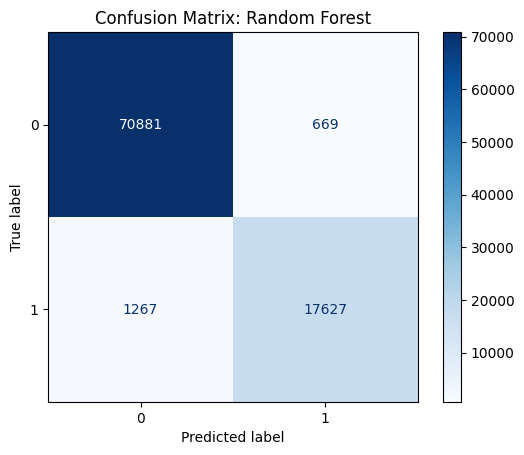

In [84]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Random Forest")
plt.show()

## Logistic Regression

In [105]:
lr = LogisticRegression(random_state=179)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

## Naive Bayes

In [85]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

In [86]:
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_nb))


Naive Bayes:
Accuracy: 0.9612135686170448
Precision: 0.9566662709248487
Recall: 0.8529691965703398
F1 Score: 0.9018466703973139
ROC-AUC: 0.9381560694231682


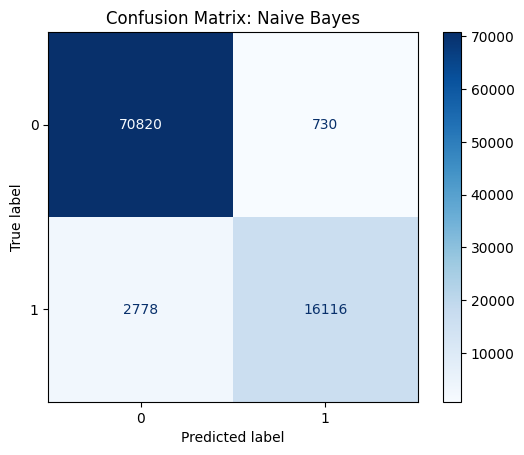

In [87]:
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

# Models and Evaluation - BalancedBaggingClassifier

## Random Forest

In [88]:
rf_bbc = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(random_state=179),
    sampling_strategy="auto",
    random_state=179,
)

rf_bbc.fit(X_train, y_train)
y_pred_rf_bbc = rf_bbc.predict(X_test)
y_proba_rf_bbc = rf_bbc.predict_proba(X_test)[:, 1]

In [89]:
print("Random Forest BBC:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_bbc))
print("Precision:", precision_score(y_test, y_pred_rf_bbc))
print("Recall:", recall_score(y_test, y_pred_rf_bbc))
print("F1 Score:", f1_score(y_test, y_pred_rf_bbc))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf_bbc))

Random Forest BBC:
Accuracy: 0.9788709035425236
Precision: 0.9640924741760944
Recall: 0.9336297237218164
F1 Score: 0.9486166007905138
ROC-AUC: 0.9720330636393839


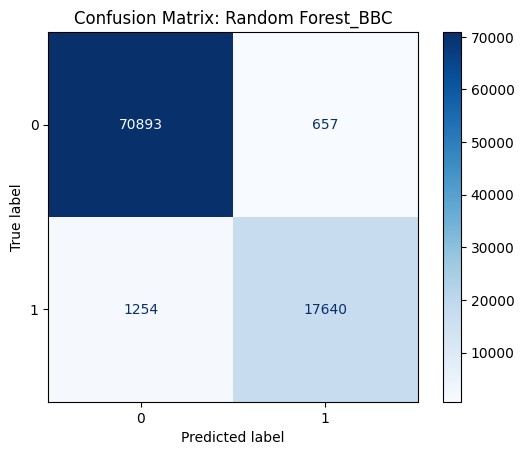

In [90]:
plot_confusion(y_test, y_pred_rf_bbc, "Random Forest_BBC")

## Logistic Regression

In [91]:
#Logistic Regression
lr_bbc = BalancedBaggingClassifier(
    estimator=LogisticRegression(max_iter=1000, random_state=179),
    sampling_strategy="auto",
    random_state=179,
)

lr_bbc.fit(X_train, y_train)
y_pred_lr_bbc = lr_bbc.predict(X_test)
y_proba_lr_bbc = lr_bbc.predict_proba(X_test)[:, 1]

In [92]:
print("\nLogistic Regression BBC:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bbc))
print("Precision:", precision_score(y_test, y_pred_lr_bbc))
print("Recall:", recall_score(y_test, y_pred_lr_bbc))
print("F1 Score:", f1_score(y_test, y_pred_lr_bbc))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr_bbc))


Logistic Regression BBC:
Accuracy: 0.8991530670912388
Precision: 0.6985655654435369
Recall: 0.9098655657880809
F1 Score: 0.7903362986460704
ROC-AUC: 0.882477370718112


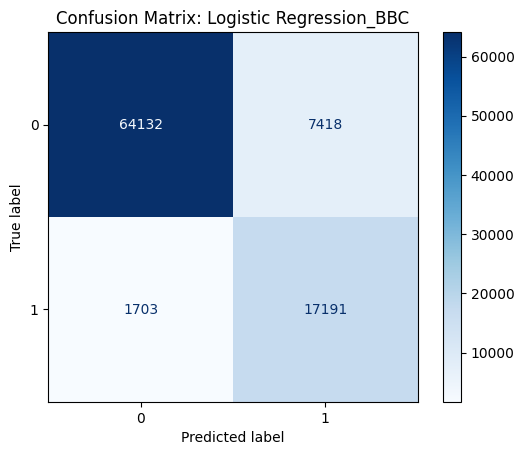

In [93]:
plot_confusion(y_test, y_pred_lr_bbc, "Logistic Regression_BBC")

## Naive Bayes

In [94]:
nb_bbc = BalancedBaggingClassifier(
    estimator=GaussianNB(),
    sampling_strategy="auto",
    random_state=179
)

nb_bbc.fit(X_train, y_train)
y_pred_nb_bbc = nb_bbc.predict(X_test)
y_proba_nb_bbc = nb_bbc.predict_proba(X_test)[:, 1]

In [95]:
print("\nNaive Bayes BBC:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bbc))
print("Precision:", precision_score(y_test, y_pred_nb_bbc))
print("Recall:", recall_score(y_test, y_pred_nb_bbc))
print("F1 Score:", f1_score(y_test, y_pred_nb_bbc))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_nb_bbc))


Naive Bayes BBC:
Accuracy: 0.9289615673787095
Precision: 0.7982300884955752
Recall: 0.8831904308246004
F1 Score: 0.8385637830096233
ROC-AUC: 0.938402869086774


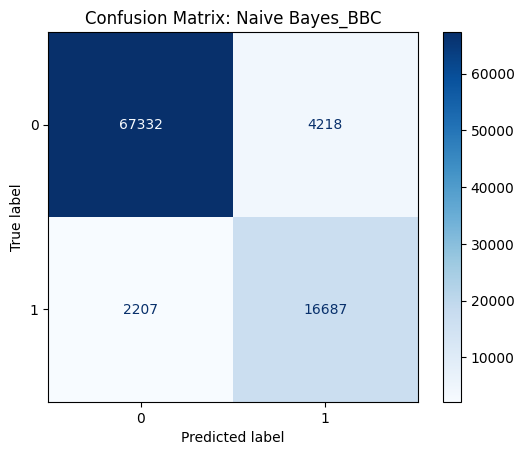

In [96]:
plot_confusion(y_test, y_pred_nb_bbc, "Naive Bayes_BBC")

# Feature Importance

In [98]:
importances = rf.feature_importances_
features = X_train.columns
feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_importance

,Feature,Importance
4,Payment_frequency,0.840580
3,Annual_premium,0.072367
13,Customer_age_encoded,0.014776
2,Product_type,0.012566
7,Customer_province,0.010269
5,Customer_type,0.009088
12,Is_no_age,0.007966
9,Broker_province,0.007287
8,Broker_region,0.006544
6,Customer_region,0.006455


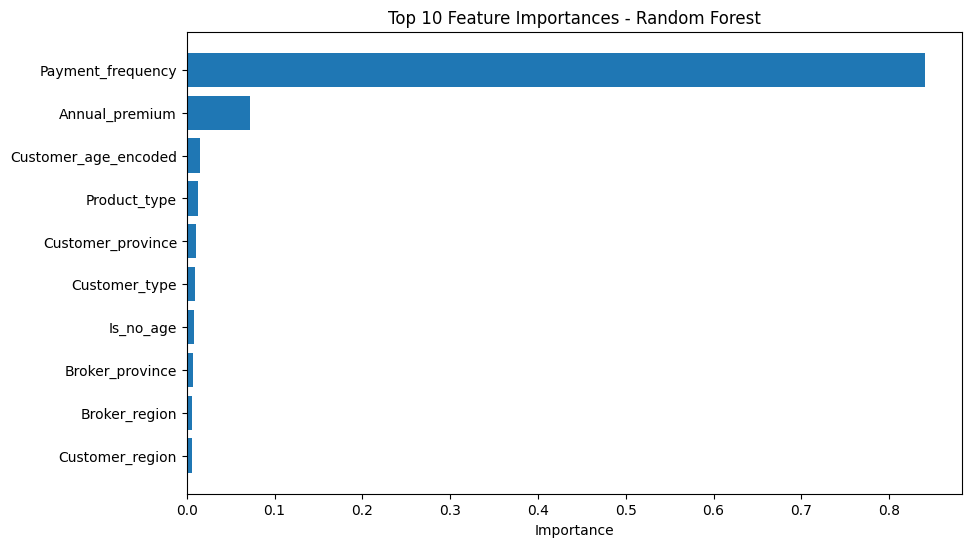

In [104]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance["Feature"].head(10)[::-1],
         feat_importance["Importance"].head(10)[::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()